In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv("Prepared_Data.csv")

In [5]:
print(df.describe())

       Customer ID  Total Spend  Items Purchased  Days Since Last Purchase
count   350.000000   350.000000       350.000000                350.000000
mean    275.500000   845.381714        12.600000                 26.588571
std     101.180532   362.058695         4.155984                 13.440813
min     101.000000   410.800000         7.000000                  9.000000
25%     188.250000   502.000000         9.000000                 15.000000
50%     275.500000   775.200000        12.000000                 23.000000
75%     362.750000  1160.600000        15.000000                 38.000000
max     450.000000  1520.100000        21.000000                 63.000000


# Univariate Analysis

(Text(0.5, 0, 'Total Spend'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Total Spend'))

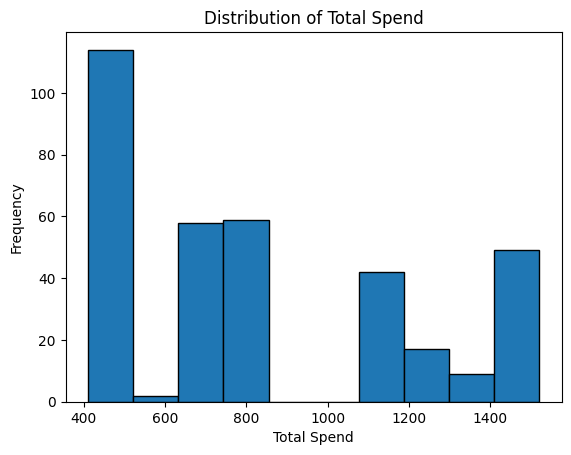

In [13]:
plt.Figure(figsize=(12,6))
plt.hist(df['Total Spend'],bins='auto',edgecolor='black')
plt.xlabel('Total Spend'), plt.ylabel('Frequency'), plt.title('Distribution of Total Spend')

(Text(0.5, 0, 'Itmes Purchased'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Items Purchased'))

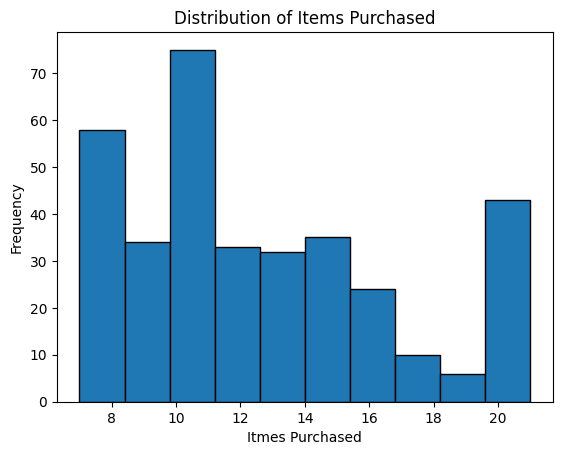

In [14]:
plt.Figure(figsize=(12,6))
plt.hist(df['Items Purchased'],bins='auto',edgecolor='black')
plt.xlabel('Itmes Purchased'), plt.ylabel('Frequency'), plt.title('Distribution of Items Purchased')

(Text(0.5, 0, 'Days Since Last Purchase'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Days Since Last Purchase'))

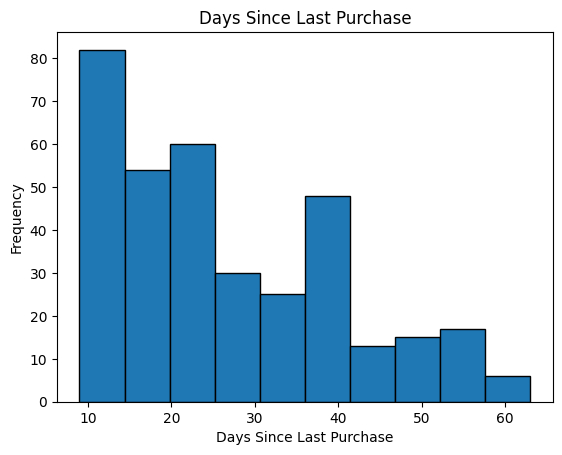

In [15]:
plt.Figure(figsize=(12,6))
plt.hist(df['Days Since Last Purchase'],bins='auto',edgecolor='black')
plt.xlabel('Days Since Last Purchase'), plt.ylabel('Frequency'), plt.title('Days Since Last Purchase')

# Detecting Outliers

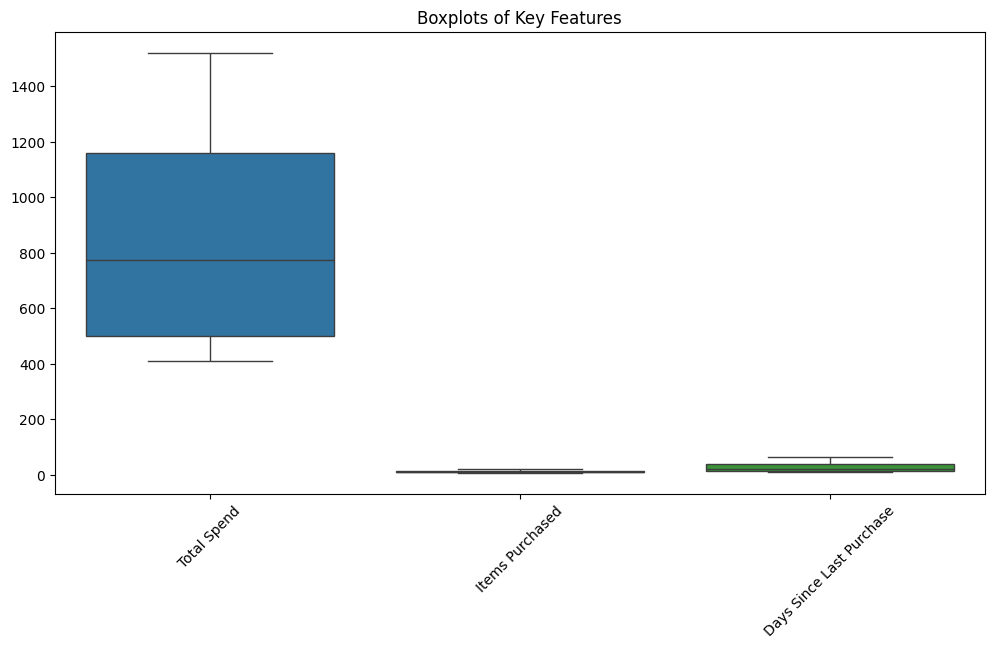

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Total Spend', 'Items Purchased', 'Days Since Last Purchase']])
plt.xticks(rotation=45) 
plt.title('Boxplots of Key Features')
plt.show()

#from the fig we can say that there are no outliers as such


# Bivariate Analysis

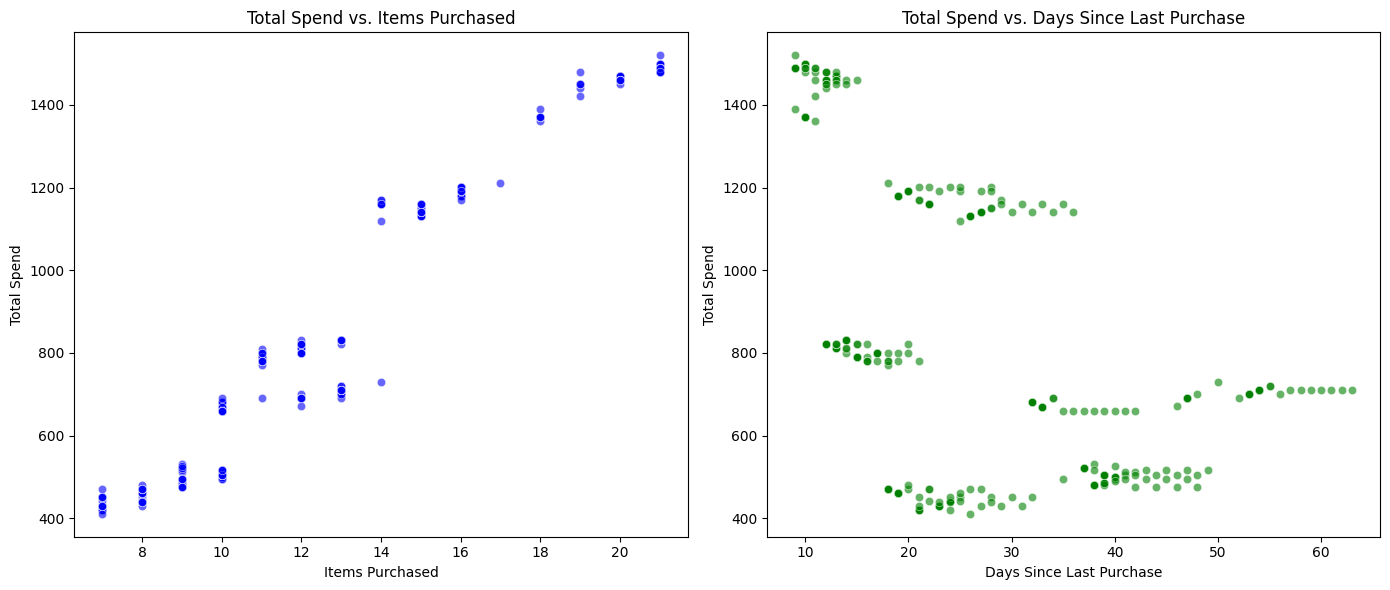

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First scatter plot: Total Spend vs. Items Purchased
plt.subplot(1, 2, 1) 
sns.scatterplot(x=df['Items Purchased'], y=df['Total Spend'], color='blue', alpha=0.6)
plt.xlabel('Items Purchased')
plt.ylabel('Total Spend')
plt.title('Total Spend vs. Items Purchased')

# Second scatter plot: Total Spend vs. Days Since Last Purchase
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Days Since Last Purchase'], y=df['Total Spend'], color='green', alpha=0.6)
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Total Spend')
plt.title('Total Spend vs. Days Since Last Purchase')

plt.tight_layout() 
plt.show()


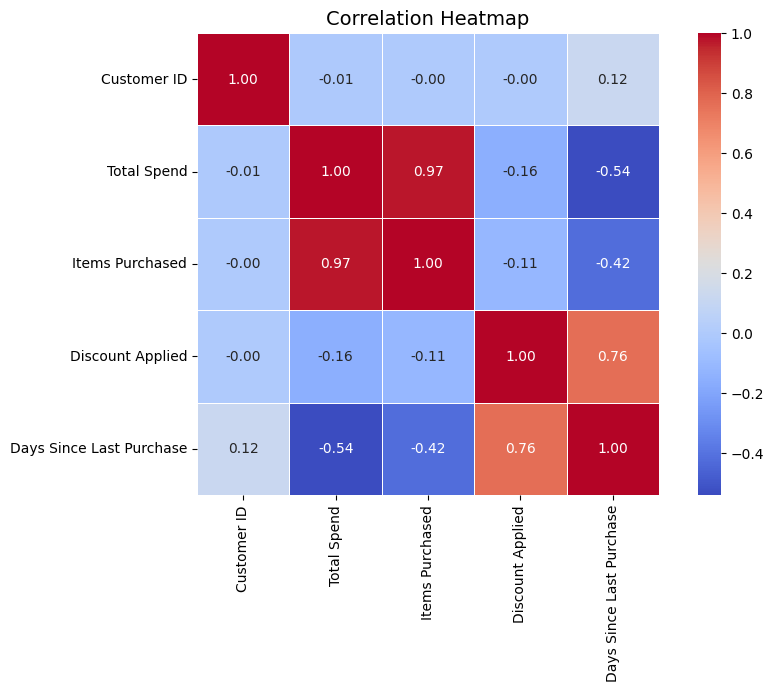

In [23]:
df.corr()
plt.figure(figsize=(10, 6))  
sns.heatmap(df.corr(), 
            annot=True,         
            fmt=".2f",         
            cmap="coolwarm",   
            linewidths=0.5,    
            square=True)       
plt.title("Correlation Heatmap", fontsize=14)  
plt.show()


# Feature Engineering 

In [45]:
# Customer Engagement Features 
df['Average Spend per Purchase']=df['Total Spend']/df['Items Purchased']
df['Purchase Frequency']=1/df['Days Since Last Purchase']
df["Discount Applied"] = df["Discount Applied"].astype(int)
df['Discount Usage Rate'] = df['Discount Applied'] / df['Total Spend']
df['Loyalty Score'] = 1 / (df['Days Since Last Purchase'] + 1)


In [44]:
# Customer Segmentation Features
spend_threshold=df['Total Spend'].mean()
df['High-Spender Flag'] = (df['Total Spend'] > spend_threshold).astype(int)

frequent_buyer_threshold = 30
df['Frequent Buyer Flag'] = (df['Days Since Last Purchase'] < frequent_buyer_threshold).astype(int)

df['Bulk Buyer Score'] = df['Items Purchased'] / df['Total Spend']


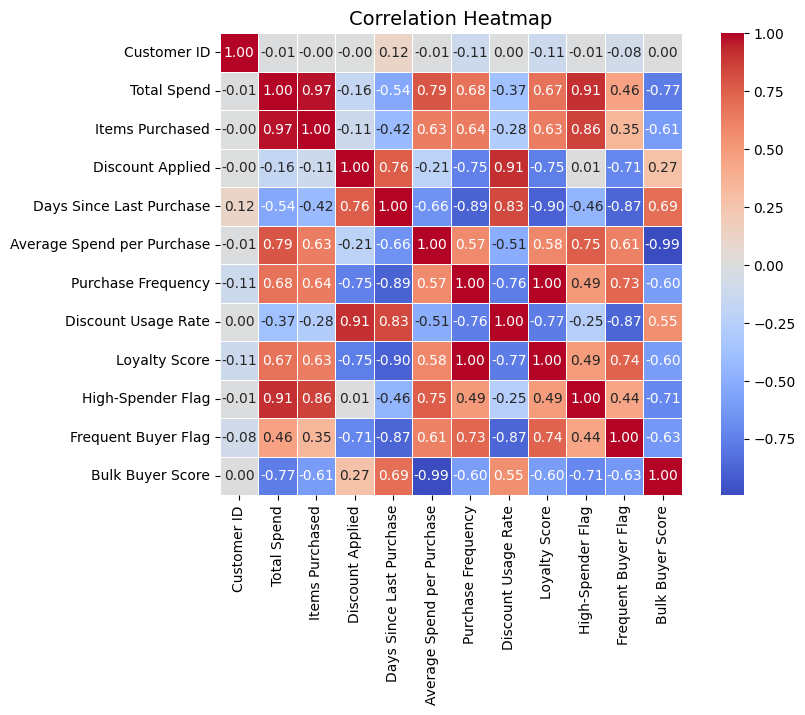

In [46]:
df.corr()
plt.figure(figsize=(10, 6))  
sns.heatmap(df.corr(), 
            annot=True,         
            fmt=".2f",         
            cmap="coolwarm",   
            linewidths=0.5,    
            square=True)       
plt.title("Correlation Heatmap", fontsize=14)  
plt.show()
